# examine the trends in CATE with diversity

In [1]:
import numpy as np
# --- plotting ---
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

## load CATE measurements

In [2]:
cv_cates = np.load('../dat/typology_covar.npy', allow_pickle=True)
cates    = np.load('../dat/typology_cate.npy', allow_pickle=True)
treats   = np.load('../dat/typology_y_treat.npy', allow_pickle=True)
controls = np.load('../dat/typology_y_control.npy', allow_pickle=True)
sig_cates= np.load('../dat/typology_sig_cate.npy', allow_pickle=True)

In [3]:
outreach_correction = 9780.

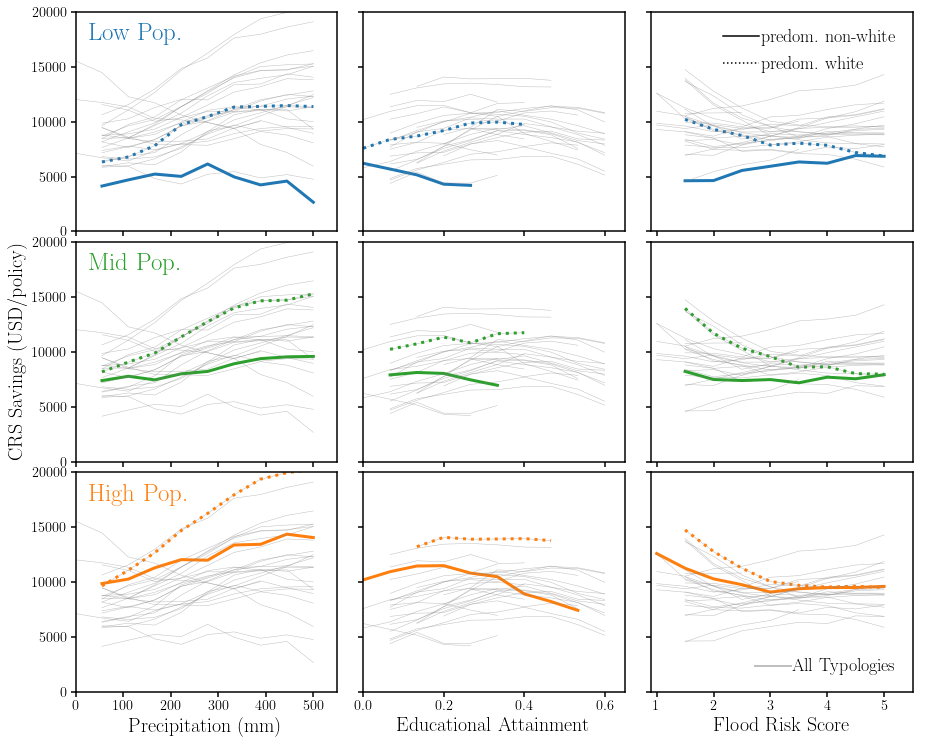

In [10]:
_ranges = [(0., 550.), (0.9, 5.5), (2.5e4, 1e5), (0, 4.5e4), (0., 0.75), (0., 0.65), (0.0, 1.)]

fig = plt.figure(figsize=(15, 12.5))

for ii in range(3):
    _i = 0
    for ii_covar, i_covar in zip([0, 2, None, 1], [0, 1, 4, 5]):
        if ii_covar is not None: 
            sub = fig.add_subplot(3,3,3*ii+ii_covar+1)
        for i_inc in range(3): 
            for i_pop in range(3): 
                for i_div in range(3):             
                    if ii_covar is not None: 
                        sub.plot(cv_cates[_i], outreach_correction-1*np.array(cates[_i]), 
                                 c='gray', alpha=0.5, lw=0.5)
                    
                        if i_inc == 0 and i_div == 0 and i_pop == ii: 
                            sub.plot(cv_cates[_i], outreach_correction-1*np.array(cates[_i]), 
                                     c=['C0', 'C2', 'C1'][i_pop], lw=3)
                        if i_inc == 0 and i_div == 2 and i_pop == ii: 
                            sub.plot(cv_cates[_i], outreach_correction-1*np.array(cates[_i]), 
                                     c=['C0', 'C2', 'C1'][i_pop], ls=':', lw=3)

                        #sub.plot(cv_cates[_i], -1*np.array(cates[_i]), c='gray', lw=0.8)
                        if ii_covar == 0 and _i == 0: 
                            sub.text(0.05, 0.95, '%s Pop.' % ['Low', 'Mid', 'High'][ii], color=['C0', 'C2', 'C1'][ii],
                                     transform=sub.transAxes, fontsize=25, ha='left', va='top')
                        if ii == 0 and ii_covar == 2 and _i == 54: 
                            sub.plot([], [], c='k', ls='-', lw=3, label='High Diversity')
                            sub.plot([], [], c='k', ls=':', lw=3, label='Low Diversity')
                            
                            sub.legend(loc='upper right', fontsize=20)

                        if ii == 2: 
                            sub.set_xlabel(['Precipitation (mm)', 'Flood Risk Score', 'Median Household Income (dollars)', 'Population',
                                        'Renter Fraction', 'Educational Attainment', 'White Fraction'][i_covar], fontsize=20)        
                        else: 
                            sub.set_xticklabels([])
                        sub.set_xlim(_ranges[i_covar][0], _ranges[i_covar][1])
                        sub.set_ylim(0., 20000.)
                        if i_covar not in [0]: sub.set_yticklabels([])
                    _i += 1

        if ii_covar == 2 and ii == 0: 
            sub.plot([], [], color='k', ls='-', label='predom.~non-white')
            sub.plot([], [], color='k', ls=':', label='predom.~white')
            sub.legend(loc='upper right', handletextpad=0.1, fontsize=18)            

        if ii_covar == 2 and ii == 2: 
            sub.plot([], [], c='gray', alpha=0.5, lw=2, label='All Typologies')            
            sub.legend(loc='lower right', fontsize=18, handletextpad=0.1)
            
bkgd = fig.add_subplot(111, frameon=False)
bkgd.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
bkgd.set_ylabel(r'CRS Savings (USD/policy)', fontsize=20, labelpad=22)
fig.subplots_adjust(wspace=0.1, hspace=0.05)
fig.savefig('cate_diversity.pdf', bbox_inches='tight')